In [18]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1. Найти количество и названия туроператоров, продающих путёвки в города Псков и Ярославль.

In [19]:
# читаем файлы
travel_agents = pd.read_csv('travel_agents.csv', delimiter=';')
travels = pd.read_csv('travels.csv', delimiter=';')
sale_of_tour_packages = pd.read_csv('sale_of_tour_packages.csv', delimiter=';')

# объединяем таблички в одну
all_data = pd.merge(sale_of_tour_packages, travel_agents, how='inner', left_on='ID туроператора', right_on='ID туроператора')
all_data = pd.merge(all_data, travels, how='inner', left_on='ID тура', right_on='ID тура')

# выбираем только те, где город это Псков или Ярославль
filtered_data = all_data[all_data['Город'].isin(['Псков', 'Ярославль'])]

# убираем повторяющиеся названия
unique_operators = filtered_data['Название'].unique()

count_operators = len(unique_operators)

print(f"Количество туроператоров: {count_operators}")
print("Названия туроператоров:", ', '.join(unique_operators))

Количество туроператоров: 21
Названия туроператоров: Восторг, Путешественник, Оглянись, Релакс, Впервые, Компас, Даль, Непознанное, Друг, Традиции, Горизонт, Вместе, Палатка, Мечта, Вокруг света, Иллюзия, Все чудеса, Ещё, Твой край, Матрица, Дивный мир


# 2. Построить круговую диаграмму, отображающую количество путёвок в города, чьё название заканчивается на букву "ь".

<Axes: title={'center': 'Количество путевок в городах, название которых заканчивается на "ь"'}, ylabel='Город'>

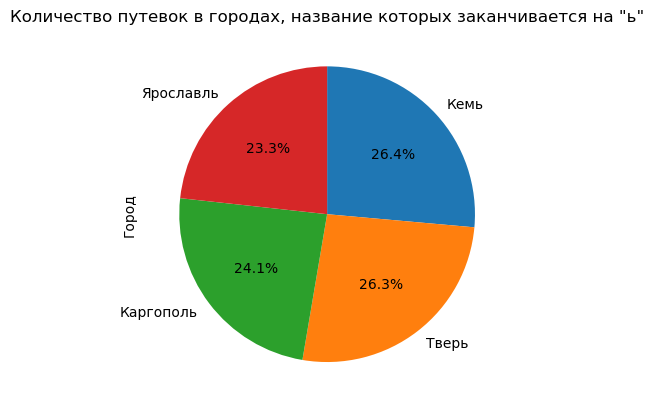

In [20]:
# объединяем таблички
merged_data = pd.merge(sale_of_tour_packages, travels, how='inner', left_on='ID тура', right_on='ID тура')

# выбираем те которые заканчиваются на "ь"
filtered_data = merged_data[merged_data['Город'].str.endswith('ь')]

# количество
city_counts = filtered_data['Город'].value_counts()

city_counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, title='Количество путевок в городах, название которых заканчивается на "ь"')

# 3. Построить диаграмму, показывающую общую стоимость всех путёвок проданных туроператорами: Традиции, Иллюзия, Даль, Восторг.

<Axes: ylabel='Название'>

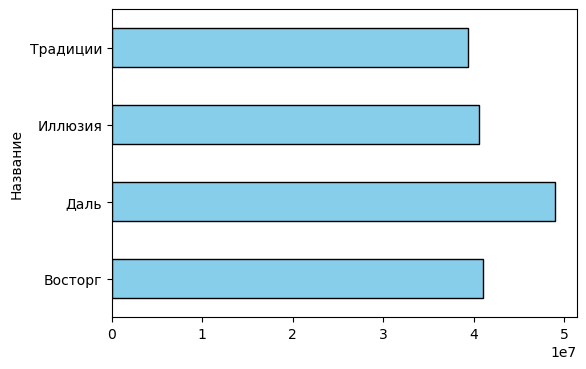

In [22]:
operators = ['Традиции', 'Иллюзия', 'Даль', 'Восторг']

#выбрали только те строки с нужными операторами
filtered_data = all_data[all_data['Название'].isin(operators)]

#посчитали общую стоимость конкретного тура за все продажи
filtered_data['Общая стоимость'] = filtered_data['Стоимость, на 1 чел'] * filtered_data['Количество проданных путёвок']

#сгруппировали, получили группы по операторам (в данном случае 4 группы), просуммировали все стоимости
total_costs = filtered_data.groupby('Название')['Общая стоимость'].sum()

#barh - столбчатая диаграмма
total_costs.plot(kind='barh', color='skyblue', edgecolor='black', figsize=(6, 4))